<a href="https://colab.research.google.com/github/Requenamar3/Data-Mining/blob/main/Data_Mining_Module2_K-means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementing KMeans Clustering for Customer Segmentation
Objective: Apply the KMeans clustering technique to perform customer segmentation with a real-world dataset not provided in the lesson. This will involve sourcing a suitable dataset, conducting an exploratory data analysis, preprocessing the data, applying the KMeans clustering algorithm, and interpreting the results to gain insights into different customer segments.

**For this assigment will segment customers based on the frequency of their orders to identify loyal customers and those at risk of churn.**

In [1]:
#package used for customer lifetime value modeling
!pip install lifetimes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00


In [2]:
 # installing the pandas_profiling package for data analysis and generating statistical report summaries.
!pip install ydata_profiling


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 8.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=7cd2ec771ac91dd0d751f2d1b850d8f9bc58f69d39a05b7dc6a5c0625b16eeae
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pa

In [3]:
# Customer Lifetime Value (CLV or CLTV)
# Buy till you die... (BG/NBD)

# Import the lifetimes package for customer lifetime value analysis.
import lifetimes
# Import pandas for data manipulation and analysis.
import pandas as pd
# Import numpy for numerical computing.
import numpy as np
# Import datetime for handling dates and times.
import datetime as dt
# Import matplotlib.pyplot for creating static, animated, and interactive visualizations.
import matplotlib.pyplot as plt
# Import seaborn for making statistical graphics.
import seaborn as sns
# Import BetaGeoFitter from lifetimes for fitting the BG/NBD model.
from lifetimes import BetaGeoFitter
# Import GammaGammaFitter from lifetimes for fitting the Gamma-Gamma model.
from lifetimes import GammaGammaFitter
# Import plot_frequency_recency_matrix for visualizing the relationship between frequency and recency.
from lifetimes.plotting import plot_frequency_recency_matrix

# Set pandas display options to improve the readability of output.
# Set the maximum number of rows to display to 500.
pd.set_option('display.max_rows', 500)
# Set the maximum number of columns to display to 500.
pd.set_option('display.max_columns', 500)
# Set the width of the display in characters to 1000.
pd.set_option('display.width', 1000)


In [4]:
#Import the ProfileReport .For creating comprehensive exploratory data analysis reports.
from ydata_profiling import ProfileReport

In [7]:
EC= pd.read_csv("https://raw.githubusercontent.com/Requenamar3/Data-Mining/main/sales_2023-10-01_2024-03-06.csv")

In [8]:
EC.head()

month    financial_status order_name              customer_email    customer_id customer_type variant_sku  product_price                            product_title shipping_region shipping_postal_code customer_cohort_week customer_cohort_quarter customer_cohort_month product_type  total_sales  net_sales  total_cost  units_per_transaction
0  2023-10                paid    #805723      mayapriebe33@gmail.com  6616065245299     Returning   SQ9178530           0.00  Bloomsy Original (Ships every 1 Months)        Colorado                80525             2023-W19                 2023-04               2023-05          NaN         0.00       0.00         0.0                      1
1  2023-10  partially_refunded    #810617  vincent.nicolais@yahoo.com  6261751251059     Returning         NaN           0.00                                      NaN         Georgia                31820             2022-W41                 2022-10               2022-10          NaN        83.88       0.00         0.0                      0
2  2023-10  partially_refunded    #810617  vincent.nicolais@yahoo.com  6261751251059     Returning   SQ8862610         642.99                          Bloomsy Premium         Georgia                31820             2022-W41                 2022-10               2022-10          NaN       694.43     642.99         0.0                      1
3  2023-10  partially_refunded    #810431    cjsherrillmain@gmail.com  3496267448435     Returning   SQ1726938          69.99                           Bloomsy Deluxe        Maryland                20636             2020-W48                 2020-10               2020-11          NaN        74.19      69.99         0.0                      1
4  2023-10  partially_refunded    #810431    cjsherrillmain@gmail.com  3496267448435     Returning         NaN           0.00                                      NaN        Maryland                20636             2020-W48                 2020-10               2020-11          NaN       -10.60     -10.60         0.0                      0

In [9]:
EC.columns

Index(['month', 'financial_status', 'order_name', 'customer_email', 'customer_id', 'customer_type', 'variant_sku', 'product_price', 'product_title', 'shipping_region', 'shipping_postal_code', 'customer_cohort_week', 'customer_cohort_quarter', 'customer_cohort_month', 'product_type', 'total_sales', 'net_sales', 'total_cost', 'units_per_transaction'], dtype='object')

In [10]:
EC= pd.read_csv("https://raw.githubusercontent.com/Requenamar3/Data-Mining/main/sales_2023-10-01_2024-03-06.csv",usecols=['customer_id', 'order_name','variant_sku','month', 'customer_cohort_month', 'total_sales', 'units_per_transaction'])

In [11]:
EC.head()


month order_name    customer_id variant_sku customer_cohort_month  total_sales  units_per_transaction
0  2023-10    #805723  6616065245299   SQ9178530               2023-05         0.00                      1
1  2023-10    #810617  6261751251059         NaN               2022-10        83.88                      0
2  2023-10    #810617  6261751251059   SQ8862610               2022-10       694.43                      1
3  2023-10    #810431  3496267448435   SQ1726938               2020-11        74.19                      1
4  2023-10    #810431  3496267448435         NaN               2020-11       -10.60                      0

In [12]:
# Create a ProfileReport object
profile = ProfileReport(EC, title="EC CLV", explorative=True)

In [13]:
# display report
profile


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
# Remove rows from 'EC' where 'total_sales' is equal to 0.00
EC = EC[EC['total_sales'] != 0.00]


In [15]:
# Remove records with 0 orders qty
EC = EC[EC['units_per_transaction'] != 0]


In [16]:
EC.head()

month order_name    customer_id variant_sku customer_cohort_month  total_sales  units_per_transaction
2   2023-10    #810617  6261751251059   SQ8862610               2022-10       694.43                      1
3   2023-10    #810431  3496267448435   SQ1726938               2020-11        74.19                      1
8   2023-10    #802622  5601422671987    BB738-24               2022-03        54.49                      1
11  2023-10    #801731  6769237557363    BB727-26               2023-07        64.34                      1
13  2023-10    #807669  6272794919027    BB944-24               2022-10        63.74                      1

In [17]:
EC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44231 entries, 2 to 158180
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  44231 non-null  object 
 1   order_name             44231 non-null  object 
 2   customer_id            44231 non-null  int64  
 3   variant_sku            44214 non-null  object 
 4   customer_cohort_month  44231 non-null  object 
 5   total_sales            44231 non-null  float64
 6   units_per_transaction  44231 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 3.7+ MB


In [18]:
EC.isnull().sum()

month                     0
order_name                0
customer_id               0
variant_sku              17
customer_cohort_month     0
total_sales               0
units_per_transaction     0
dtype: int64

In [19]:
EC.dropna(inplace=True)  # inplace=True means we dropped them permanently

In [20]:
EC.isnull().sum()

month                    0
order_name               0
customer_id              0
variant_sku              0
customer_cohort_month    0
total_sales              0
units_per_transaction    0
dtype: int64

In [21]:
EC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44214 entries, 2 to 158180
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  44214 non-null  object 
 1   order_name             44214 non-null  object 
 2   customer_id            44214 non-null  int64  
 3   variant_sku            44214 non-null  object 
 4   customer_cohort_month  44214 non-null  object 
 5   total_sales            44214 non-null  float64
 6   units_per_transaction  44214 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.7+ MB


In [22]:
EC.describe()

customer_id   total_sales  units_per_transaction
count  4.421400e+04  44214.000000           44214.000000
mean   5.562729e+12    117.220923               1.005406
std    1.682923e+12    149.469024               0.084234
min    1.183560e+12      0.220000               1.000000
25%    5.028425e+12     49.530000               1.000000
50%    6.368478e+12     59.600000               1.000000
75%    6.996533e+12     84.790000               1.000000
max    7.301131e+12   3507.540000               5.000000

#Data Preprocessing

I capped the data by setting outliers to the boundary values. This reduces the impact of very extreme values when conducting statistical analyses or building machine learning models.

Outliers are replaced with the upper and lower boundaries calculated based on default quantiles (5th and 95th percentiles).

In [23]:
def find_boundaries(df, variable,q1=0.05,q2=0.95):
    # the boundaries are the quantiles
    lower_boundary = df[variable].quantile(q1) # lower quantile
    upper_boundary = df[variable].quantile(q2) # upper quantile
    return upper_boundary, lower_boundary
def capping_outliers(df,variable):
    upper_boundary,lower_boundary =  find_boundaries(df,variable)
    df[variable] = np.where(df[variable] > upper_boundary, upper_boundary,
                       np.where(df[variable] < lower_boundary, lower_boundary, df[variable]))

In [24]:
# Function to cap outliers in the 'Total_sales'
capping_outliers(EC, 'total_sales')

# Function to cap outliers in the 'units_per_transaction'
capping_outliers(EC, 'units_per_transaction')


In [25]:
EC.describe()

customer_id   total_sales  units_per_transaction
count  4.421400e+04  44214.000000                44214.0
mean   5.562729e+12    109.982135                    1.0
std    1.682923e+12    118.461722                    0.0
min    1.183560e+12     42.790000                    1.0
25%    5.028425e+12     49.530000                    1.0
50%    6.368478e+12     59.600000                    1.0
75%    6.996533e+12     84.790000                    1.0
max    7.301131e+12    498.934000                    1.0

In [26]:
#add new column and Convert 'month' to datetime format, assuming the first day of the month.
EC['month_date'] = pd.to_datetime(EC['month'], format='%Y-%m')

# add new column and Convert 'customer_cohort_month' to datetime format, assuming the first day of the month.
EC['customer_cohort_date'] = pd.to_datetime(EC['customer_cohort_month'], format='%Y-%m')

In [27]:
#remove the 'month' and 'customer_cohort_month' columns
EC.drop(['month', 'customer_cohort_month'], axis=1, inplace=True)

EC.head()

order_name    customer_id variant_sku  total_sales  units_per_transaction month_date customer_cohort_date
2     #810617  6261751251059   SQ8862610      498.934                    1.0 2023-10-01           2022-10-01
3     #810431  3496267448435   SQ1726938       74.190                    1.0 2023-10-01           2020-11-01
8     #802622  5601422671987    BB738-24       54.490                    1.0 2023-10-01           2022-03-01
11    #801731  6769237557363    BB727-26       64.340                    1.0 2023-10-01           2023-07-01
13    #807669  6272794919027    BB944-24       63.740                    1.0 2023-10-01           2022-10-01

#Applying the Elbow Method

For the assigment I need to create a feature that represents the frequency of purchases by each customer.



In [28]:
# Group by customer_id and count the number of orders.
frequency_EC = EC.groupby('customer_id')['order_name'].count().reset_index()

# Rename the columns for clarity.
frequency_EC.columns = ['customer_id', 'purchase_frequency']

# You can now merge this back with your original DataFrame if you need to maintain all data.
EC = pd.merge(EC, frequency_EC, on='customer_id')

In [29]:
EC.head()

order_name    customer_id variant_sku  total_sales  units_per_transaction month_date customer_cohort_date  purchase_frequency
0    #810617  6261751251059   SQ8862610      498.934                    1.0 2023-10-01           2022-10-01                   1
1    #810431  3496267448435   SQ1726938       74.190                    1.0 2023-10-01           2020-11-01                  10
2    #802622  5601422671987    BB738-24       54.490                    1.0 2023-10-01           2022-03-01                   4
3    #801731  6769237557363    BB727-26       64.340                    1.0 2023-10-01           2023-07-01                   1
4    #807669  6272794919027    BB944-24       63.740                    1.0 2023-10-01           2022-10-01                   4

In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scale the 'purchase_frequency' column
scaler = StandardScaler()
EC_scaled = scaler.fit_transform(EC[['purchase_frequency']])

In [31]:
# Apply the Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):  # testing 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(EC_scaled)
    wcss.append(kmeans.inertia_)

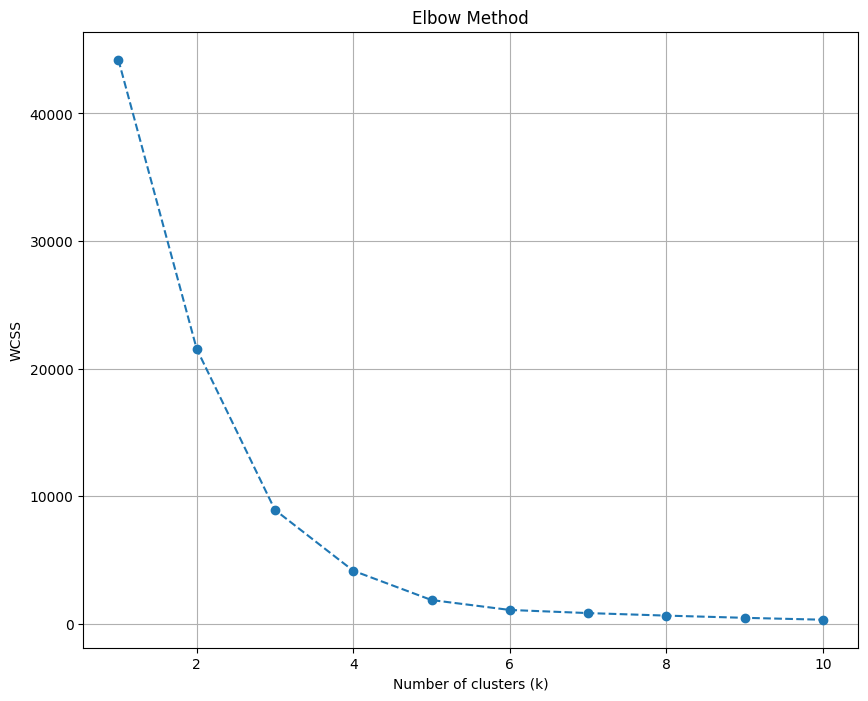

In [32]:
# Plotting the results onto a line graph to observe 'The elbow'
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

The Elbow Method graph suggests the optimal number of clusters for the data is 3, as the reduction in variance within the clusters plateaus after this point.

#KMeans Clustering

In [33]:
# Identified number of clusters from the elbow method
k = 3

# Implement KMeans with the identified number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model
kmeans.fit(EC_scaled)

# Predict the clusters
clusters = kmeans.predict(EC_scaled)

# Append the cluster predictions to the original dataframe
EC['cluster'] = clusters

# Display the dataframe with the clusters
EC.head()


order_name    customer_id variant_sku  total_sales  units_per_transaction month_date customer_cohort_date  purchase_frequency  cluster
0    #810617  6261751251059   SQ8862610      498.934                    1.0 2023-10-01           2022-10-01                   1        0
1    #810431  3496267448435   SQ1726938       74.190                    1.0 2023-10-01           2020-11-01                  10        2
2    #802622  5601422671987    BB738-24       54.490                    1.0 2023-10-01           2022-03-01                   4        0
3    #801731  6769237557363    BB727-26       64.340                    1.0 2023-10-01           2023-07-01                   1        0
4    #807669  6272794919027    BB944-24       63.740                    1.0 2023-10-01           2022-10-01                   4        0

#Analyzing and Visualizing the Clusters

Calculate the mean values of the features for each cluster.

In [38]:
# Identify numeric columns for mean calculation
numeric_columns = EC.select_dtypes(include=[np.number]).columns.tolist()

# Calculate mean values of the numeric features for each cluster.
cluster_means = EC.groupby('cluster')[numeric_columns].mean()

Create visual plots to display the distribution of features within each cluster (e.g., histograms, scatter plots).

Create Histograms showing the distribution of values separated by cluster

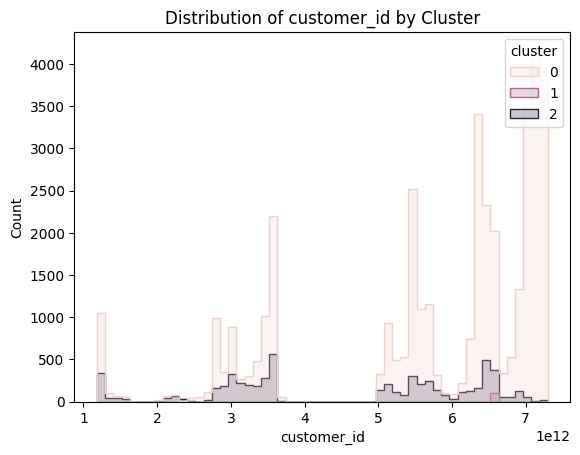

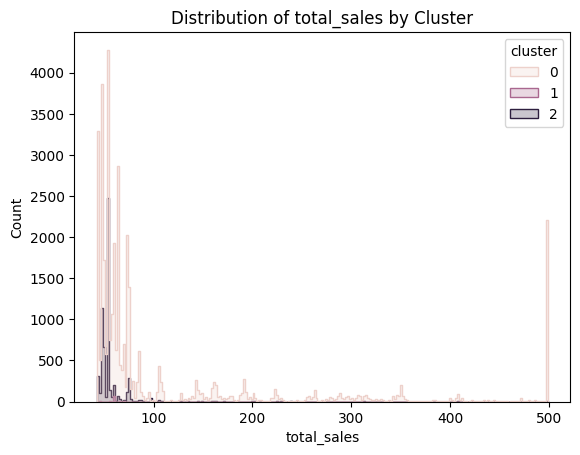

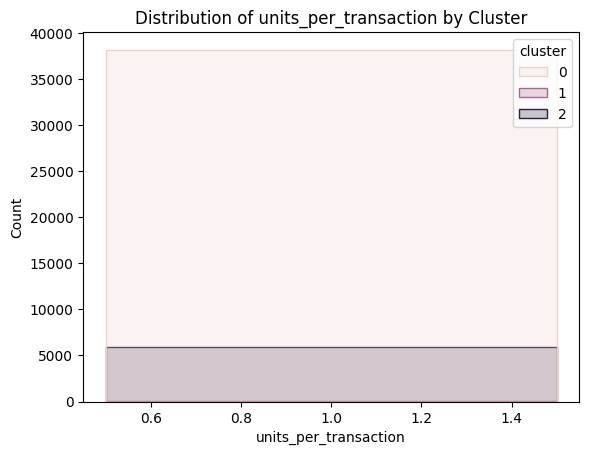

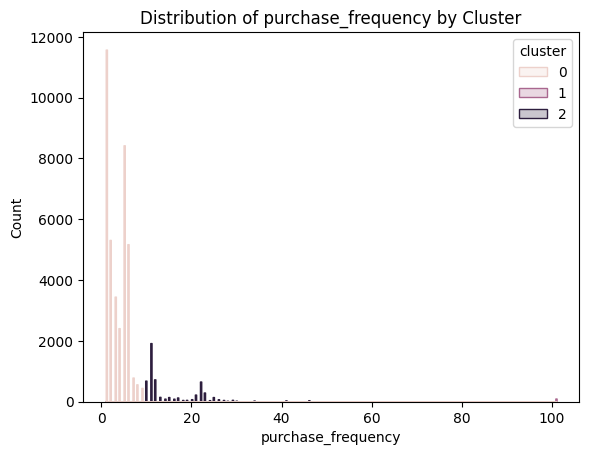

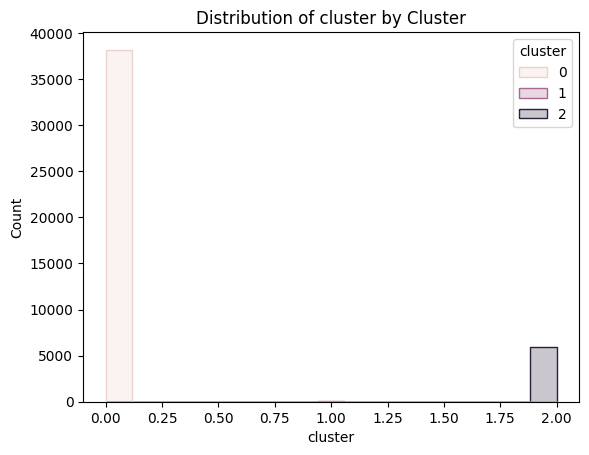

In [44]:
for column in numeric_columns:
    sns.histplot(data=EC, x=column, hue='cluster', element='step', kde=False)  # Set kde to False
    plt.title(f'Distribution of {column} by Cluster')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


# Reporting Findings

The majority of sales transactions are of low value across all clusters. This could indicate that the company’s primary revenue may come from high-volume, low-margin sales.  Cluster 2 includes higher-value transactions. This indicates that customers in Cluster 2 either make occasional larger purchases or there are a few customers who make significantly larger contributions to total sales.Each cluster represents different customer segments. 0 regular customers, 1 less frequent or new customers, 2 premium customers or bulk purchases (marketplaces)


Based on the optimal number of three clusters indicated by the Elbow Method, here are different marketing strategies tailored for each segment:

**Cluster 1: High Frequency, Low Sales Volume**

* Loyalty Programs: Encourage repeat purchases with a points system or discounts.
* Cross-Selling: Recommend complementary products to increase transaction value.
* Feedback Incentives: Offer benefits for completing surveys to better understand their needs.
* Implement a tiered loyalty program to encourage more frequent visits.
* Offer small, frequent discounts to maintain their regular purchases.

**Cluster 2: High Sales Volume, Low Frequency**

* Personalized Marketing: Use customer data to send personalized offers and communications.
* Membership Exclusives: Provide VIP services or exclusive access to new products to boost engagement.
* Develop a rewards program that accumulates with higher spending.
* Event Invitations: Host special events or sales previews to increase purchase frequency.
* Create personalized, high-value offers to encourage larger purchases

**Cluster 3: Moderate Frequency and Volume**
* Bundle Deals: Package popular products together at a discount to encourage larger purchases.
* Email Newsletters: Regular updates about new products, tips, or educational content to keep the brand top-of-mind.
* Referral Benefits: Implement a referral program that rewards customers for bringing in new business.
* Introduce flash sales or limited-time offers to create a sense of urgency.
* Provide flexible payment plans or financing options for larger purchases.




